# Goal of the project :

The "FinTech" company launch there android and iOS mobile base app and want to grow there business. \
But there is problem how to recomended this app and offer who realy want to use it. \
So for that company desided to give free trial to each and every customer for 24 houre
and collect data from the customers. In this senariao some customer purchase the app and someone not. \
According to this data company want to give special offer to the customer who are not interested to buy without offer
and grow thre business.

 This is classification problem


# Import essential libraries

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

# Import dataset & explore

In [2]:
fineTech_appData = pd.read_csv(r"FineTech_appData.csv")

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [4]:
fineTech_appData.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [5]:
for i in range(fineTech_appData.shape[0]):
    print(fineTech_appData.loc[i,'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 

product_review,product_review2,ScanPreview 

Splash,Cycle,Home,Credit3Container,Credit3Dashboard,Loan2,product_review,pr

idscreen,joinscreen,product_review,product_review2,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Leaderboard,Home,Loan2 

Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Container 

joinscreen,Cycle,Saving9,SavingGoalOther,Saving1,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,VerifySSN,Credit1,Credit3Dashboard,Loan2,product_review,product_review2,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,SelectInstitution,BankVerification 

Splash,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Credit3Container,Institutions,SelectInstitution,product_review,product_review,BankVerification 

joinscreen,Saving9,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2,Loan2,product_review,product_review2,VerifyCountry,VerifyToken,product_review,product_review,SelectInstitution,BankVerification 

joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN 

Splash,idscreen,Cycle,Home,product_review,product_review,Loan2,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review 

Cycle,product_review,location,VerifyPhone,VerifyToken 

joinscreen,product_review,product_review2,ScanPreview,Loan2,VerifyCountry,VerifyPhone,VerifyToken,ProfileVerifySSN,MLWebView,product_review,SelectInstitution,BankVerification,Home,TransactionList,Credit3Container,CommunityAndInvites 

Home,Credit3,ScanPreview,ReferralContainer,Settings,LandingScreen,Login,idscreen,Loan3,Signup,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken 

idscreen,joinscreen,product_review,product_review2,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_r

Home,Loan2,Institutions,SelectInstitution,BankVerification,product_review,product_review2,location,VerifyCountry,VerifyPhone,VerifyToken,Credit3Container,VerifyDateOfBirth,VerifySSN,Credit1,Credit3Dashboard,ReferralContainer,product_review 

idscreen,Cycle,Splash,Home,Loan2,Loan1,ProfilePage,Settings,Institutions 

idscreen,Home,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Loan3,ReferralContainer,Credit3,product_review,product_review,product_review3,VerifyCountry,product_review,product_review2,product_review3,product_review,product_review,product_review,product_review,product_review,Loan4,product_review 

idscreen,Cycle,Home,Loan3,Loan1,WebView,Finances,ManageFinances,Credit3,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Rewards,CC1,CC1Category,CC3 

idscreen,Credit3,product_review3,product_review,product_review,Loan3,Finances 

idscreen,Home,Loan3,product_review,product_review,product_review3,VerifyDateOfBirth,location 

joinscreen,Credit3Container,ScanPreview 

idscree


ScanPreview,Loan2,product_review,product_review2,ProfilePage,VerifyPhone,VerifyDateOfBirth,location,Saving2,Saving2Amount,Saving8,ProfileMaritalStatus,ProfileChildren,ProfileVerifyIncomeType,ProfileAnnualIncome,ProfileJobTitle,ProfileCompanyName,ProfileEmploymentLength 

idscreen,Cycle,Home,Loan3,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,ResendToken 

joinscreen,product_review2,ScanPreview,VerifyDateOfBirth,product_review,Home 

Home,product_review,product_review3,product_review,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN,product_review,SelectInstitution,BVPlaidLinkContainer 

Home,Credit3Container,Settings,ProfilePage,ProfileEducation,ProfileEducationMajor,ProfileMaritalStatus,Saving8,VerifyHousing,VerifyHousingAmount,ProfileChildren,ScanPreview,VerifyDateOfBirth,location,Saving9,Saving1,Saving10,Saving4,SelectIn

idscreen,joinscreen,Cycle,product_review,product_review2,ScanPreview,Loan2,VerifyCountry,VerifyPhone,VerifyToken,ProfileVerifySSN,product_review,SelectInstitution,BankVerification,Home 

Splash,Home,product_review3,VerifyDateOfBirth,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,product_review,location,RewardsContainer 

Home 

idscreen,Cycle,Home,Loan3,LoanAppScheduleCall 

idscreen,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2,Loan2,product_review,product_review,product_review3,VerifyCountry,VerifyToken 

joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,VerifyCountry,VerifyPhone,VerifyToken 

Home,Loan3,ProfilePage,Saving9,VerifyHousing,VerifyHousingAmount,Saving8,Saving4,Saving7,Saving6,Saving5,Alerts,Rewards 

Cycle,Credit3Container,location,VerifyDateOfBirth,VerifyMobile,Credit1,product_review2,ScanPreview,product_review4,VerifyCountry,VerifyPhone,VerifyToken,product_review,prod

idscreen,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3,Loan3,product_review,product_review,product_review3,VerifyCountry,VerifyToken,product_review,product_review2,product_review3,product_review,product_review,product_review,SelectInstitution 

Splash,Cycle,Home,Loan2,Loan1,History,RewardsContainer 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,ProfilePage,EditProfile,VerifyIncomeType,VerifyAnnualIncome,ProfileJobTitle,ProfileCompanyName,ProfileEmploymentLength,CC1,RewardsContainer,SelectInstitution,BankVerification,Home,Settings,ListPicker,Saving8,ProfileChildren,VerifyHousing,VerifyHousingAmount,Saving9,Saving1,Saving10,Saving4,Saving7,Saving6,Saving5,Loan2,Institutions 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2,Loan2,product_review,product_review,product_review3,VerifyCountry,VerifyToken,location,Credit3Container,

idscreen,joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,Home,Loan2,Institutions,Credit3Container,CommunityAndInvites 

Splash,idscreen,Cycle,product_review,Home,Loan2,Institutions,Credit3Container,ReferralContainer,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,ProfileVerifySSN,product_review,SelectInstitution,BankVerification 

idscreen,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN 

product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,SelectInstitution,BankVerification,Credit3Container,location,VerifyDateOfBirth,ReferralContainer,Institutions,Loan2,Home

Loan1,Loan2 

idscreen,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3,Credit2,Rewards,ProfilePage,VerifyCountry,VerifyToken 

joinscreen,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,ProfileVerifySSN,product_review,SelectInstitution,BankVerification 

Splash,idscreen,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard 

idscreen,joinscreen,Home,Loan2,Institutions,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,VerifySSN,Credit1,Credit3Dashboard 

product_review,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN,product_review,SelectInstitution 

idscreen,Cycle,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,SelectInstitution,BankVerificatio

Splash,idscreen,Home,Loan2,Credit3Container,ScanPreview,Institutions,SelectInstitution,product_review,product_review,product_review3,CC1,CC1Category,CC3,RewardsContainer,RewardDetail,Leaderboard,Alerts,ProfilePage,EditProfile,VerifySSN,VerifyPhone,Credit1 

idscreen,Home,Loan3,product_review,product_review,product_review3,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN,product_review,SelectInstitution,BankVerification 

idscreen,joinscreen,Cycle,product_review,Loan2,Home,Institutions,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,SelectInstitution,BankVerification 

Splash,Home,Alerts,Credit3Container,Credit3Dashboard,Loan2,product_review,product_review2,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,SelectInstitution,BankVerification 

Cycle,Home,Loan2,Institutions,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,Verify

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 

SignupName,Login,LoginForm,joinscreen,Home,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,VerifySSN,Loan2,Institutions,CommunityAndInvites,ProfilePage,Rewardjoinscreen,RewardsContainer,RewardDetail,Credit1,Credit3Dashboard 

product_review,product_review2,ScanPreview,VerifyDateOfBirth 

Splash,Cycle,Home,Institutions,SelectInstitution,BankVerification,Loan2,ReferralContainer,FindFriendsCycle,NewContactListInvite,Credit3Container,Credit3Dashboard,Alerts 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,Home,Loan2 

idscreen,product_review,Home,Credit3,ReferralContainer,Loan3,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN 

idscreen,product_review,Home,product_review,product_review,product_review,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_re

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,VerifyCountry,VerifyPhone,VerifyToken,NetworkFailure,VerifySSN,Home,Credit3Container,Settings 

idscreen,product_review,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN,Home,Loan3,Finances,Credit3,ReferralContainer,CC1,CC1Category,CC3,ProfilePage 

product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,SelectInstitution 

idscreen,product_review,product_review,product_review,Home,ScanPreview,location,VerifyDateOfBirth 

Loan2,Loan1,MLWebView,LoanAppPaymentSchedule,LoanAppScheduleCall,LoanAppSuccess,Home 

idscreen,Cycle,product_review,Home,Loan3,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_re


idscreen,joinscreen,product_review,Loan2,product_review2,product_review3,product_review4,product_review5,ScanPreview,product_review,ProfilePage 

Cycle,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN 

idscreen,Home,ScanPreview 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2,Loan2 

Splash,idscreen,Cycle,product_review,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution 

VerifyDateOfBirth,VerifyCountry,product_review,product_review,product_review,product_review,LoanAppPaymentSchedule,product_review,Loan3 

Splash,Cycle,Home,Loan2 

Loan2,LLLoanAmount,Home 

joinscreen,Credit3Container,Loan2,Institutions,Home,CommunityAndInvites,product_review,product_review2,product_review3,product_review4,product

idscreen,Home,ScanPreview 

Splash,Cycle,Home,Alerts,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,VerifySSN,Credit1,Credit3Dashboard,CommunityAndInvites,Institutions,Loan2,product_review,product_review2 

Home,Loan2,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN,product_review,SelectInstitution,BankVerification,location,product_review 

joinscreen,Cycle,Credit3Container,ScanPreview,location,VerifyDateOfBirth,VerifyMobile,VerifySSN,Credit1,Credit3Dashboard,Credit2,Institutions,Loan2,Home,CommunityAndInvites,ProfilePage,MLWebView,product_review,product_review2 

idscreen,Home,Loan3,Finances,Credit3,ReferralContainer,product_review,product_review,product_review,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review2,product_review3,product_review,VerifySSN,product_review,SelectInstitution,BankVerification 

joinscreen,product_review,location,VerifyToken,VerifySSN,product_review,Sele

product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken 

Home,Leaderboard,Loan2,product_review,product_review2,location,VerifyCountry,VerifySSN,product_review,Settings,LoginForm,Login,Splash,Credit3Container,ProfilePage,EditProfile 

idscreen,joinscreen,product_review,Home,Loan2,product_review2,VerifyDateOfBirth,location,Credit3Container,Institutions,SelectInstitution,CC1,CC1Category,CC3 

idscreen,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3,Loan3,Finances,ReferralContainer,CC1,CC1Category,product_review,product_review,product_review3,VerifyCountry,VerifyToken,product_review,product_review2,product_review3,product_review,product_review,product_review,SelectInstitution,BankVerification 

idscreen,joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,YourNetwork,Home,Loan2,Institutions,SelectInstitution,BankVerification,locat

Splash,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2,CC1,CC1Category,CC3,ReviewCreditCard,MLWebView,SelectInstitution,BankVerification,product_review,product_review,product_review3,VerifyCountry,VerifyToken,product_review,product_review 

idscreen,product_review,Home,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken 

idscreen,joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN 

idscreen,Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,Loan2,Institutions,Credit3Container,ReferralContainer,RewardsContainer 

Credit3Container,CommunityAndInvites,Institutions,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyPhone 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,CommunityAndInvites,Loan2,Institutions,Home 

Cycle,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credi

Splash,Home,ReferralContainer,product_review,product_review,product_review3,location,VerifyCountry,product_review,product_review,VerifySSN 

Splash,idscreen,Cycle,product_review,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,product_review,product_review,product_review3,VerifyCountry,VerifyToken,product_review,product_review,product_review,product_review,SelectInstitution,BankVerification,SecurityModal 

Splash,idscreen,Cycle,Home,product_review,product_review,product_review3,ScanPreview,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification 

idscreen,Cycle,product_review,product_review,product_review,product_review3,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,ResendToken,Home,Finances,Credit3,Loan3 

Splash,Home,Alerts,Credit3Dashboard,Loan2,Loan1,MLWebView,Credit3Container,Institutions 

joinscreen,Cycle,Saving9,SavingGoalOther,Saving1,Saving10,Saving4,Saving7,Saving6

Splash,Cycle,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location 

product_review,product_review2,location,VerifyCountry,VerifyToken,ProfileVerifySSN,product_review,SelectInstitution,BankVerification,Home,Loan2,ProfilePage 

Home,Leaderboard,Alerts,Credit3Container,Credit3Dashboard,product_review 

idscreen,Cycle,Home,Loan2,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,VerifySSN,product_review,SelectInstitution,BankVerification,product_review,product_review,product_review,Loan4 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location 

Home,Loan2,Credit3Container,product_review,product_review,product_review3,ScanPreview,VerifyDateOfBirth 

Loan2 

Home,Loan2,product_review,Institutions 

idscreen,Home,SelectInstitution,product_review,product_review3,Institutions 

idscreen,Splash,Home,Loan2,Institutions,BankVeri

Splash,idscreen,product_review3,VerifyCountry,VerifyPhone,VerifyToken,product_review,product_review,SelectInstitution,BankVerification 

Home,Loan3,Finances,ManageFinances,Credit3,Settings,CC1,WebView 

joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3,Credit2,Loan3,product_review,product_review,product_review3,VerifyCountry,VerifyToken,product_review,product_review2,product_review3,product_review,product_review,SelectInstitution,BankVerification 

idscreen,joinscreen,Cycle,product_review,Home,Leaderboard,Alerts,CC1,CC1Category,ProfilePage,SelectInstitution,EditProfile,VerifyPhone 

joinscreen,Loan2,CommunityAndInvites,FindFriendsCycle,NewContactListInvite,Credit3Container,ScanPreview,ProfilePage,Rewardjoinscreen,RewardsContainer,RewardDetail,SelectInstitution,Home 

Splash,idscreen,Cycle,product_review,Home,Loan2,product_review,product_revi

Home,Loan2,product_review,Institutions,Credit3Container,product_review3,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,product_review,ReferralContainer,LoginForm 

idscreen,Home,Loan3,product_review,product_review,product_review3,ScanPreview,Credit3 

Home,ReferralContainer,NewContactListInvite,FindFriendsCycle,product_review,product_review,VerifyDateOfBirth,location,VerifyCountry,VerifyToken,product_review,product_review,product_review3,product_review2,Loan3,SelectInstitution,CC1,CC3 

joinscreen,product_review,product_review2,ScanPreview,Home,Leaderboard,Loan2,Institutions,Credit3Container,ReferralContainer,FindFriendsCycle,NewContactListInvite,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN 

Home,ScanPreview,VerifyDateOfBirth,Credit3Dashboard,Credit2,ReferralContainer,Credit3Container,Loan2,product_review,product_review,product_review,product_review,SelectInstitution,BankVerification 

Home,Loan2,location,VerifyCountry,VerifyPhone,Profil

In [6]:
fineTech_appData.isnull().sum() # check for Null Values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
fineTech_appData.info() # Brief Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
fineTech_appData.describe() # give Distribution on Numeric Variables

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [9]:
features = fineTech_appData.columns
for i in features:
    print('''Unique Features Values of {} is\n {} \n and len is {} \n........................\n'''
         .format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

Unique Features Values of user is
 [235136 333588 254414 ... 302367 324905  27047] 
 and len is 49874 
........................

Unique Features Values of first_open is
 ['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638'] 
 and len is 49747 
........................

Unique Features Values of dayofweek is
 [3 6 1 4 2 0 5] 
 and len is 7 
........................

Unique Features Values of hour is
 [' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00'] 
 and len is 24 
........................

Unique Features Values of age is
 [ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46

In [10]:
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [11]:
fineTech_appData.hour

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [12]:
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)

In [13]:
fineTech_appData.hour

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [14]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int32 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [15]:
# drop object dtype 
fineTech_appData2 = fineTech_appData.drop(['user','first_open','screen_list','enrolled_date'], axis = 1)

In [16]:
fineTech_appData2.head()

dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1

# Numeric Data Vizualition

# HeatMap Using Correlation Matrix

Text(0.5, 1.0, 'HeatMap Using Correlation Matrix for fineTech_appData2')

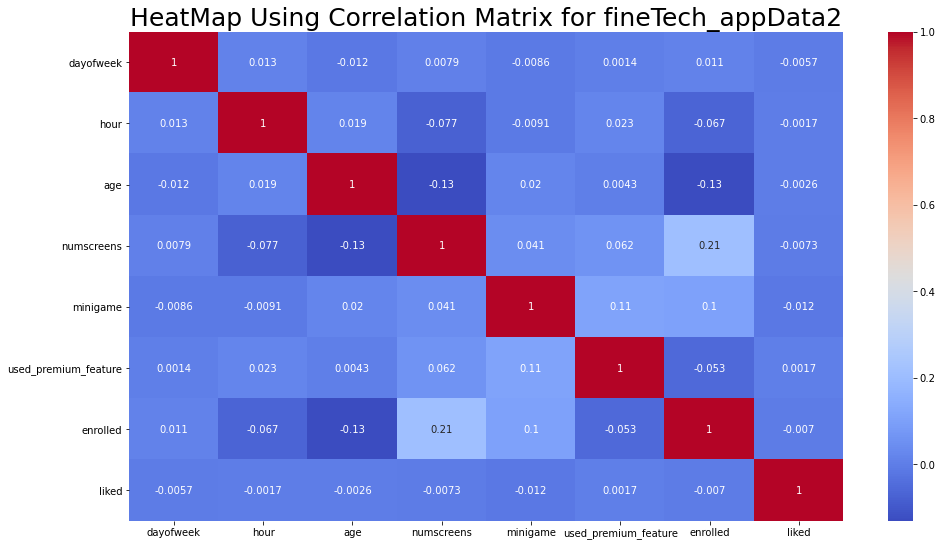

In [17]:
plt.figure(figsize=(16,9))

sns.heatmap(fineTech_appData2.corr(), annot=True, cmap='coolwarm')# Show Heatmap

plt.title('HeatMap Using Correlation Matrix for fineTech_appData2',fontsize = 25)

# Pair Plot on fineTech_appData2

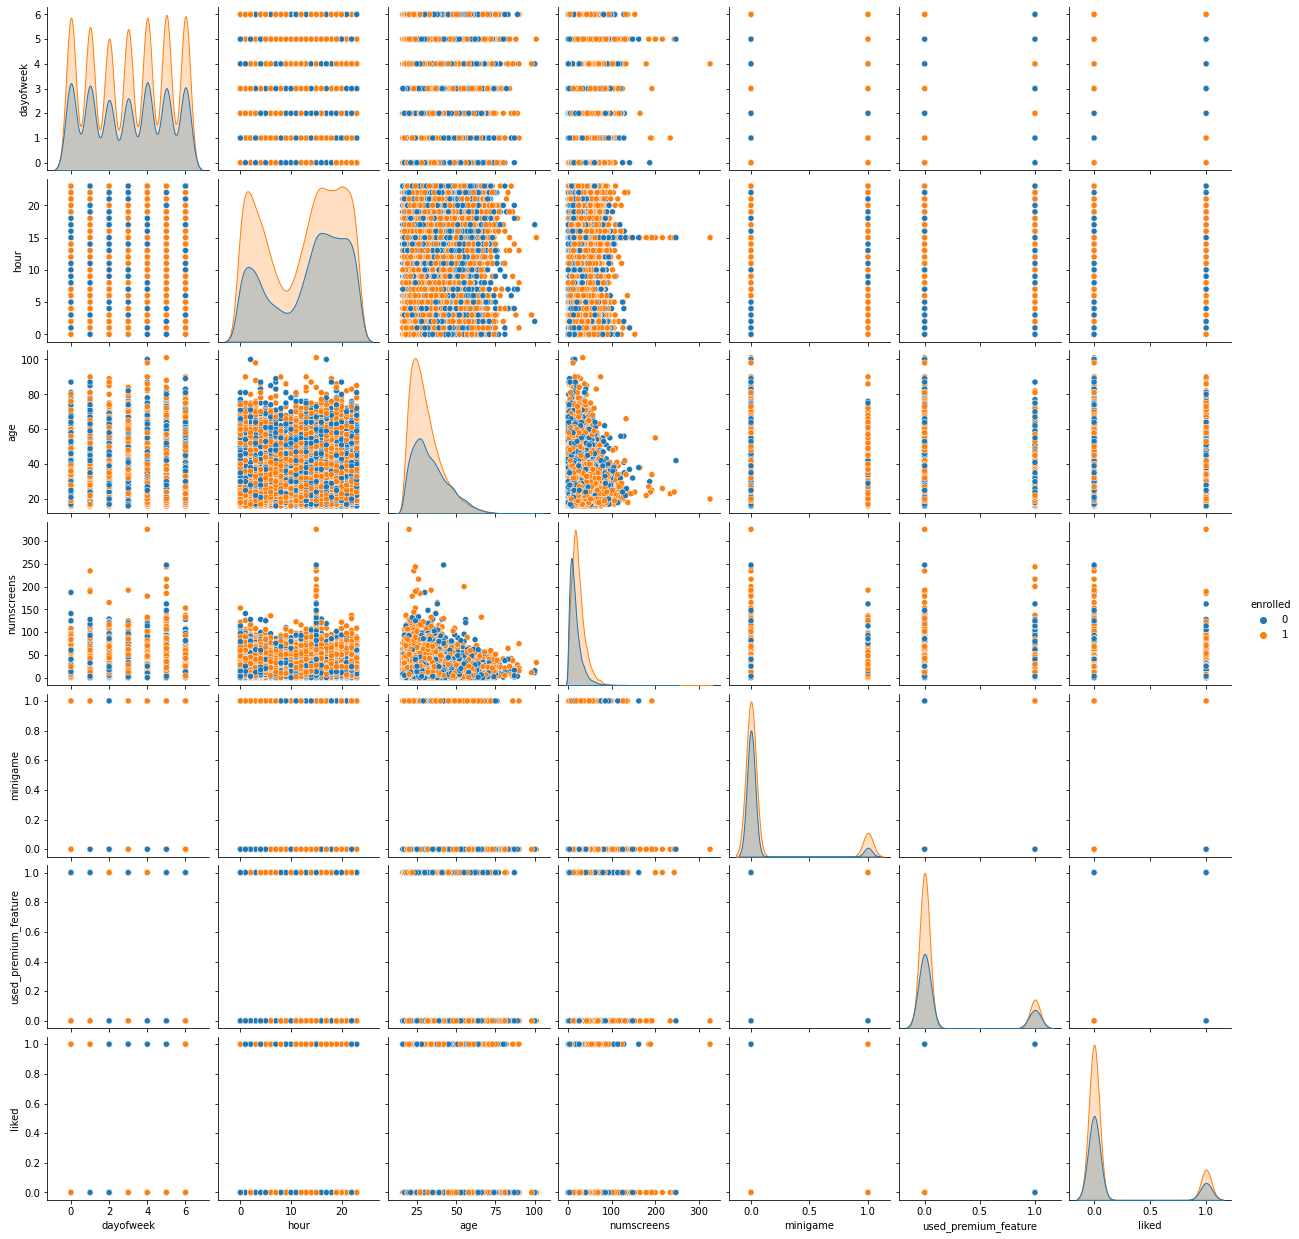

In [18]:
sns.pairplot(fineTech_appData2, hue='enrolled')

People Not Enrolled 18926 Out of 50000
People Enrolled 31074 Out of 50000


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


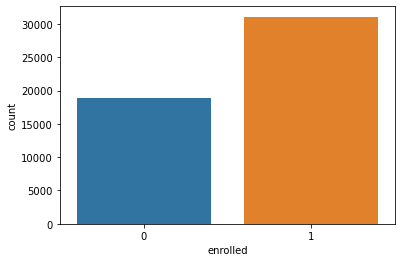

In [19]:
# CountPlot on Enrolled
sns.countplot(fineTech_appData2.enrolled)
print('People Not Enrolled',(fineTech_appData2.enrolled < 1).sum(),'Out of 50000')
print('People Enrolled',(fineTech_appData2.enrolled > 0).sum(),'Out of 50000')

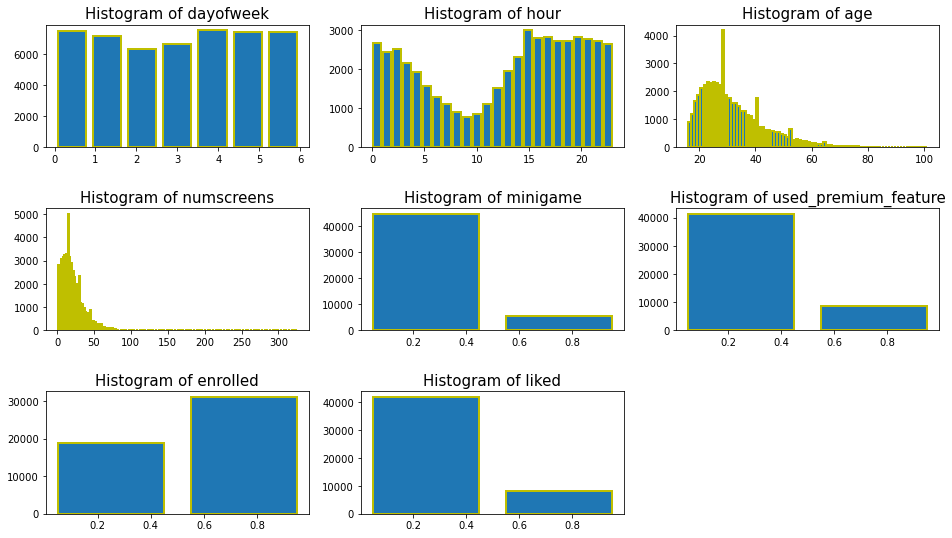

In [20]:
plt.figure(figsize=(16, 9)) # Figure size in ratio of 16:9
features = fineTech_appData2.columns # List of columns names
for i,j in enumerate(features):
    plt.subplot(3,3,i+1) # Create subplots of Histogram
    plt.title('Histogram of {}'.format(j), fontsize = 15 ) # title of Histogram
    
    bins = len(fineTech_appData2[j].unique()) #bins of Histogram
    plt.hist(fineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = 'y', linewidth = 2) # plot Histogram
plt.subplots_adjust(hspace = 0.5)

In [21]:
for i,j in enumerate(fineTech_appData2.columns):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


# Correlation Bar Plot with Enrolled

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


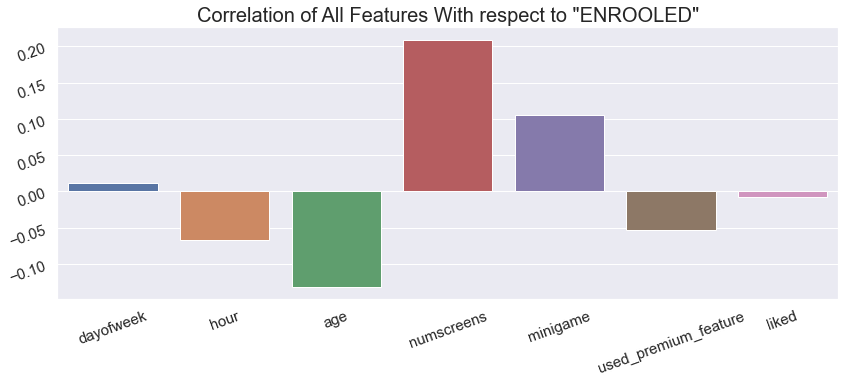

In [22]:
# show corelation barplot

sns.set() # set background dark grid
plt.figure(figsize=(14,5))
plt.title('Correlation of All Features With respect to "ENROOLED"', fontsize = 20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1) # drop enrolled Feature
ax = sns.barplot(fineTech_appData3.columns, fineTech_appData3.corrwith(fineTech_appData2.enrolled)) # plot Barplot
ax.tick_params(labelsize = 15, labelrotation = 20, color = 'k')

In [23]:
# Parsing Object Date into date time format
fineTech_appData['first_open'] = [parser.parse(i) for i in fineTech_appData['first_open']]


In [24]:
fineTech_appData['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]

In [25]:
fineTech_appData.first_open
fineTech_appData.enrolled_date

0                           NaT
1                           NaT
2                           NaT
3       2013-07-05 16:11:49.513
4       2013-02-26 18:56:37.841
                  ...          
49995   2013-05-09 13:47:52.875
49996                       NaT
49997                       NaT
49998   2013-04-28 12:35:38.709
49999                       NaT
Name: enrolled_date, Length: 50000, dtype: datetime64[ns]

In [26]:
fineTech_appData['time_to_enrolled'] = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

In [27]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
 12  time_to_enrolled      31074 non-null  float64       
dtypes: datetime64[ns

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

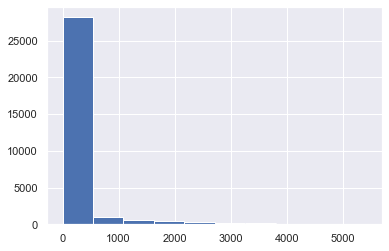

In [28]:
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

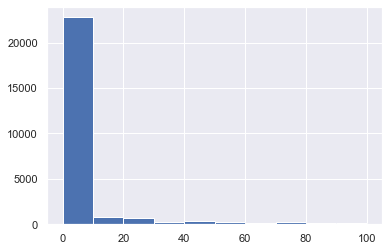

In [29]:
plt.hist(fineTech_appData['time_to_enrolled'].dropna(),range=(0,100)) 

Here we Understand Maximum Customers Have Bought Premium Feature Under 10 hrs

In [30]:
# Those Customers have Enrolled after 48 hrs set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [31]:
fineTech_appData

user              first_open  dayofweek  hour  age  \
0      235136 2012-12-27 02:14:51.273          3     2   23   
1      333588 2012-12-02 01:16:00.905          6     1   24   
2      254414 2013-03-19 19:19:09.157          1    19   23   
3      234192 2013-07-05 16:08:46.354          4    16   28   
4       51549 2013-02-26 18:50:48.661          1    18   31   
...       ...                     ...        ...   ...  ...   
49995  222774 2013-05-09 13:46:17.871          3    13   32   
49996  169179 2013-04-09 00:05:17.823          1     0   35   
49997  302367 2013-02-20 22:41:51.165          2    22   39   
49998  324905 2013-04-28 12:33:04.288          6    12   27   
49999   27047 2012-12-14 01:22:44.638          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled           enrolled_date  \
0             0                     0         0                     NaT   
1             0                     0         0                     NaT   
2             0                     1         0                     NaT   
3             0                     0         1 2013-07-05 16:11:49.513   
4             0                     0         1 2013-02-26 18:56:37.841   
...         ...                   ...       ...                     ...   
49995         0                     0         1 2013-05-09 13:47:52.875   
49996         0                     1         0                     NaT   
49997         0                     0         0                     NaT   
49998         0                     0         1 2013-04-28 12:35:38.709   
49999         0                     0         0                     NaT   

       liked  time_to_enrolled  
0          0               NaN  
1          0               NaN  
2          1               NaN  
3          0               0.0  
4          1               0.0  
...      ...               ...  
49995      0               0.0  
49996      0               NaN  
49997      0               NaN  
49998      0               0.0  
49999      1               NaN  

[50000 rows x 13 columns]

In [32]:
fineTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'time_to_enrolled'],
      dtype='object')

In [33]:
fineTech_appData.drop(columns=['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [34]:
fineTech_appData

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [35]:
fineTech_app_screen_Data = pd.read_csv(r'top_screens.csv').top_screens.values

In [36]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [37]:
type(fineTech_app_screen_Data)

numpy.ndarray

In [38]:
# Add ',' at the end of each string of  'sreen_list' for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','

In [39]:
fineTech_appData

user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                     Splash,Cycle,Loan,           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                Cycle,Splash,Home,RewardsContainer,           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled  liked  
0             0                     0         0      0  
1             0                     0         0      0  
2             0                     1         0      1  
3             0                     0         1      0  
4             0                     0         1      1  
...         ...                   ...       ...    ...  
49995         0                     0         1      0  
49996         0                     1         0      0  
49997         0                     0         0      0  
49998         0                     0         1      0  
49999         0                     0         0      1  

[50000 rows x 10 columns]

In [40]:
# string into to number

for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+',','')

In [41]:
fineTech_appData.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   

   used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                     0         0      0      1         0             0   
1                     0         0      0      1         1             1   
2                     1         0      1      0         0             0   
3                     0         1      0      0         1             0   
4                     0         1      1      1         0             1   

   Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                 0            1                 0                  1   
1                 0            1                 0                  1   
2                 0            0                 0                  0   
3                 0            1                 0                  1   
4                 1            1                 1                  0   

   ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0            0              0      1         1                 0      0   
1            0              1      0         0                 0      0   
2            0              0      1         0                 0      0   
3            0              0      0         0                 0      1   
4            0              1      1         1                 0      0   

   CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0            0       0     0    0                 0        0        0   
1            0       0     0    0                 0        0        0   
2            0       1     1    0                 0        0        0   
3            0       0     0    0                 0        1        1   
4            0       0     0    0                 0        0        1   

   EditProfile  Credit2  Finances  CC3  Saving9  Saving1  Alerts  Saving8  \
0            0        0         0    0        0        0       0        0   
1            0        0         0    0        0        0       0        0   
2            0        0         0    0        0        0       0        0   
3            0        1         1    0        0        0       0        0   
4            0        0         0    0        0        0       0        0   

   Saving10  Leaderboard  Saving4  VerifyMobile  VerifyHousing  RewardDetail  \
0         0            0        0             0              0             0   
1         0            0        0             0              0             0   
2         0            0        0             0              0             0   
3         0            1        0             0              0             1   
4         0            0        0             0              0             0   

   VerifyHousingAmount  ProfileMaritalStatus  ProfileChildren   \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   ProfileEducation  Saving7  ProfileEducationMajor  Rewards  AccountView  \
0                 0        0                      0        0            0   
1                 0        0                      

In [42]:
# Test
fineTech_appData.screen_list.str.contains('splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [43]:
# test
fineTech_appData.screen_list.str.replace('Splash'+",", "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [44]:
# get shape
fineTech_appData.shape

(50000, 68)

In [45]:
# head of DataFrame
fineTech_appData.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   

   used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                     0         0      0      1         0             0   
1                     0         0      0      1         1             1   
2                     1         0      1      0         0             0   
3                     0         1      0      0         1             0   
4                     0         1      1      1         0             1   

   Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                 0            1                 0                  1   
1                 0            1                 0                  1   
2                 0            0                 0                  0   
3                 0            1                 0                  1   
4                 1            1                 1                  0   

   ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0            0              0      1         1                 0      0   
1            0              1      0         0                 0      0   
2            0              0      1         0                 0      0   
3            0              0      0         0                 0      1   
4            0              1      1         1                 0      0   

   CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0            0       0     0    0                 0        0        0   
1            0       0     0    0                 0        0        0   
2            0       1     1    0                 0        0        0   
3            0       0     0    0                 0        1        1   
4            0       0     0    0                 0        0        1   

   EditProfile  Credit2  Finances  CC3  Saving9  Saving1  Alerts  Saving8  \
0            0        0         0    0        0        0       0        0   
1            0        0         0    0        0        0       0        0   
2            0        0         0    0        0        0       0        0   
3            0        1         1    0        0        0       0        0   
4            0        0         0    0        0        0       0        0   

   Saving10  Leaderboard  Saving4  VerifyMobile  VerifyHousing  RewardDetail  \
0         0            0        0             0              0             0   
1         0            0        0             0              0             0   
2         0            0        0             0              0             0   
3         0            1        0             0              0             1   
4         0            0        0             0              0             0   

   VerifyHousingAmount  ProfileMaritalStatus  ProfileChildren   \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   ProfileEducation  Saving7  ProfileEducationMajor  Rewards  AccountView  \
0                 0        0                      0        0            0   
1                 0        0                      

In [46]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [47]:
fineTech_appData.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [48]:
# count remain screen list and store counted number in 'remain_screen_list'

fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(',')

In [49]:
fineTech_appData.drop(columns=['screen_list'], inplace = True)

In [50]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                         0         0      0      1         0             0   
1                         0         0      0      1         1             1   
2                         1         0      1      0         0             0   
3                         0         1      0      0         1             0   
4                         0         1      1      1         0             1   
...                     ...       ...    ...    ...       ...           ...   
49995                     0         1      0      0         0             0   
49996                     1         0      0      0         0             0   
49997                     0         0      0      0         1             0   
49998                     0         1      0      0         1             0   
49999                     0         0      1      1         0             0   

       Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                     0            1                 0                  1   
1                     0            1                 0                  1   
2                     0            0                 0                  0   
3                     0            1                 0                  1   
4                     1            1                 1                  0   
...                 ...          ...               ...                ...   
49995                 0            1                 0                  0   
49996                 0            0                 0                  0   
49997                 0            1                 0                  1   
49998                 0            1                 1                  1   
49999                 0            0                 0                  1   

       ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0                0              0      1         1                 0      0   
1                0              1      0         0                 0      0   
2                0              0      1         0                 0      0   
3                0              0      0         0                 0      1   
4                0              1      1         1                 0      0   
...            ...            ...    ...       ...               ...    ...   
49995            0              0      0         0                 1      0   
49996            0              0      1         0                 0      0   
49997            0              1      0         0                 0      0   
49998            0              1      1         0                 0      0   
49999            1              1      0         0                 0      0   

       CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0                0       0     0    0                 0        0        0   
1                0       0     0    0                 0        0        0   
2                0       1     1    0                 0        0        0   
3                0       0     0    0                 0        1        1   
4                0       0     0    0                 0        0    

In [51]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [52]:
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [53]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                         0         0      0      1         0             0   
1                         0         0      0      1         1             1   
2                         1         0      1      0         0             0   
3                         0         1      0      0         1             0   
4                         0         1      1      1         0             1   
...                     ...       ...    ...    ...       ...           ...   
49995                     0         1      0      0         0             0   
49996                     1         0      0      0         0             0   
49997                     0         0      0      0         1             0   
49998                     0         1      0      0         1             0   
49999                     0         0      1      1         0             0   

       Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                     0            1                 0                  1   
1                     0            1                 0                  1   
2                     0            0                 0                  0   
3                     0            1                 0                  1   
4                     1            1                 1                  0   
...                 ...          ...               ...                ...   
49995                 0            1                 0                  0   
49996                 0            0                 0                  0   
49997                 0            1                 0                  1   
49998                 0            1                 1                  1   
49999                 0            0                 0                  1   

       ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0                0              0      1         1                 0      0   
1                0              1      0         0                 0      0   
2                0              0      1         0                 0      0   
3                0              0      0         0                 0      1   
4                0              1      1         1                 0      0   
...            ...            ...    ...       ...               ...    ...   
49995            0              0      0         0                 1      0   
49996            0              0      1         0                 0      0   
49997            0              1      0         0                 0      0   
49998            0              1      1         0                 0      0   
49999            1              1      0         0                 0      0   

       CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0                0       0     0    0                 0        0        0   
1                0       0     0    0                 0        0        0   
2                0       1     1    0                 0        0        0   
3                0       0     0    0                 0        1        1   
4                0       0     0    0                 0        0    

In [54]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [55]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                         0         0      0      1         0             0   
1                         0         0      0      1         1             1   
2                         1         0      1      0         0             0   
3                         0         1      0      0         1             0   
4                         0         1      1      1         0             1   
...                     ...       ...    ...    ...       ...           ...   
49995                     0         1      0      0         0             0   
49996                     1         0      0      0         0             0   
49997                     0         0      0      0         1             0   
49998                     0         1      0      0         1             0   
49999                     0         0      1      1         0             0   

       VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0                1                 0                  1            0   
1                1                 0                  1            0   
2                0                 0                  0            0   
3                1                 0                  1            0   
4                1                 1                  0            0   
...            ...               ...                ...          ...   
49995            1                 0                  0            0   
49996            0                 0                  0            0   
49997            1                 0                  1            0   
49998            1                 1                  1            0   
49999            0                 0                  1            1   

       VerifyCountry  Cycle  idscreen  Loan3  CC1Category  Splash  Loan  CC1  \
0                  0      1         1      0            0       0     0    0   
1                  1      0         0      0            0       0     0    0   
2                  0      1         0      0            0       1     1    0   
3                  0      0         0      1            0       0     0    0   
4                  1      1         1      0            0       0     0    0   
...              ...    ...       ...    ...          ...     ...   ...  ...   
49995              0      0         0      0            0       1     0    0   
49996              0      1         0      0            0       1     0    0   
49997              1      0         0      0            0       0     0    0   
49998              1      1         0      0            0       0     0    0   
49999              1      0         0      0            0       0     0    0   

       RewardsContainer  EditProfile  Finances  CC3  Alerts  Leaderboard  \
0                     0            0         0    0       0            0   
1                     0            0         0    0       0            0   
2                     0            0         0    0       0            0   
3                     0            0         1    0       0            1   
4                     0            0         0    0       0            0   
...                 ...          ...       ..

In [56]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, axis = 1, inplace = True)

In [57]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                         0         0      0      1         0             0   
1                         0         0      0      1         1             1   
2                         1         0      1      0         0             0   
3                         0         1      0      0         1             0   
4                         0         1      1      1         0             1   
...                     ...       ...    ...    ...       ...           ...   
49995                     0         1      0      0         0             0   
49996                     1         0      0      0         0             0   
49997                     0         0      0      0         1             0   
49998                     0         1      0      0         1             0   
49999                     0         0      1      1         0             0   

       VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0                1                 0                  1            0   
1                1                 0                  1            0   
2                0                 0                  0            0   
3                1                 0                  1            0   
4                1                 1                  0            0   
...            ...               ...                ...          ...   
49995            1                 0                  0            0   
49996            0                 0                  0            0   
49997            1                 0                  1            0   
49998            1                 1                  1            0   
49999            0                 0                  1            1   

       VerifyCountry  Cycle  idscreen  Loan3  Splash  Loan  RewardsContainer  \
0                  0      1         1      0       0     0                 0   
1                  1      0         0      0       0     0                 0   
2                  0      1         0      0       1     1                 0   
3                  0      0         0      1       0     0                 0   
4                  1      1         1      0       0     0                 0   
...              ...    ...       ...    ...     ...   ...               ...   
49995              0      0         0      0       1     0                 0   
49996              0      1         0      0       1     0                 1   
49997              1      0         0      0       0     0                 0   
49998              1      1         0      0       0     0                 0   
49999              1      0         0      0       0     0                 0   

       EditProfile  Finances  Alerts  Leaderboard  VerifyMobile  \
0                0         0       0            0             0   
1                0         0       0            0             0   
2                0         0       0            0             0   
3                0         1       0            1             0   
4                0         0       0            0             0   
...            ...       ...     ...          ...           ...   
49995            0         0    

In [58]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, axis = 1, inplace = True)

In [59]:
fineTech_appData

user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  location  Institutions  \
0                         0         0      0         0             0   
1                         0         0      0         1             1   
2                         1         0      1         0             0   
3                         0         1      0         1             0   
4                         0         1      1         0             1   
...                     ...       ...    ...       ...           ...   
49995                     0         1      0         0             0   
49996                     1         0      0         0             0   
49997                     0         0      0         1             0   
49998                     0         1      0         1             0   
49999                     0         0      1         0             0   

       VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0                1                 0                  1            0   
1                1                 0                  1            0   
2                0                 0                  0            0   
3                1                 0                  1            0   
4                1                 1                  0            0   
...            ...               ...                ...          ...   
49995            1                 0                  0            0   
49996            0                 0                  0            0   
49997            1                 0                  1            0   
49998            1                 1                  1            0   
49999            0                 0                  1            1   

       VerifyCountry  Cycle  idscreen  Splash  RewardsContainer  EditProfile  \
0                  0      1         1       0                 0            0   
1                  1      0         0       0                 0            0   
2                  0      1         0       1                 0            0   
3                  0      0         0       0                 0            0   
4                  1      1         1       0                 0            0   
...              ...    ...       ...     ...               ...          ...   
49995              0      0         0       1                 0            0   
49996              0      1         0       1                 1            0   
49997              1      0         0       0                 0            0   
49998              1      1         0       0                 0            0   
49999              1      0         0       0                 0            0   

       Finances  Alerts  Leaderboard  VerifyMobile  VerifyHousing  \
0             0       0            0             0              0   
1             0       0            0             0              0   
2             0       0            0             0              0   
3             1       0            1             0              0   
4             0       0            0             0              0   
...         ...     ...          ...           ...            ...   
49995         0       0            0             0              0   
49996         0       0          

In [60]:
fineTech_appData.shape

(50000, 50)

In [61]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [62]:
fineTech_appData.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.497000      0.165000   
std        0.310156              0.377402      0.499996      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      0.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location  Institutions   VerifyPhone  BankVerification  \
count  50000.000000  50000.000000  50000.000000      50000.000000   
mean       0.517760      0.293660      0.524600          0.319540   
std        0.499689      0.455443      0.499399          0.466303   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        1.000000      0.000000      1.000000          0.000000   
75%        1.000000      1.000000      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       VerifyDateOfBirth   ProfilePage  VerifyCountry         Cycle  \
count       50000.000000  50000.000000   50000.000000  50000.000000   
mean            0.473480      0.158040       0.423160      0.364860   
std             0.499301      0.364782       0.494065      0.481396   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.000000      0.000000       0.000000      0.000000   
50%             0.000000      0.000000       0.000000      0.000000   
75%             1.000000      0.000000       1.000000      1.000000   
max             1.000000      1.000000       1.000000      1.000000   

           idscreen        Splash  RewardsContainer   EditProfile  \
count  50000.000000  50000.000000      50000.000000  50000.000000   
mean       0.340700      0.200760          0.084000      0.048980   
std        0.473949      0.400573          0.277391      0.215828   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        1.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

           Finances        Alerts   Leaderboard  VerifyMobile  VerifyHousing  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean       0.076540      0.073720      0.051520      0.053860       0.045080   
std        0.265863      0.261317      0.221058      0.225743       0.207482   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       RewardDetail  VerifyHousingAmount 

## Heatmap with correlation matrix of new fineTech_appData

<AxesSubplot:>

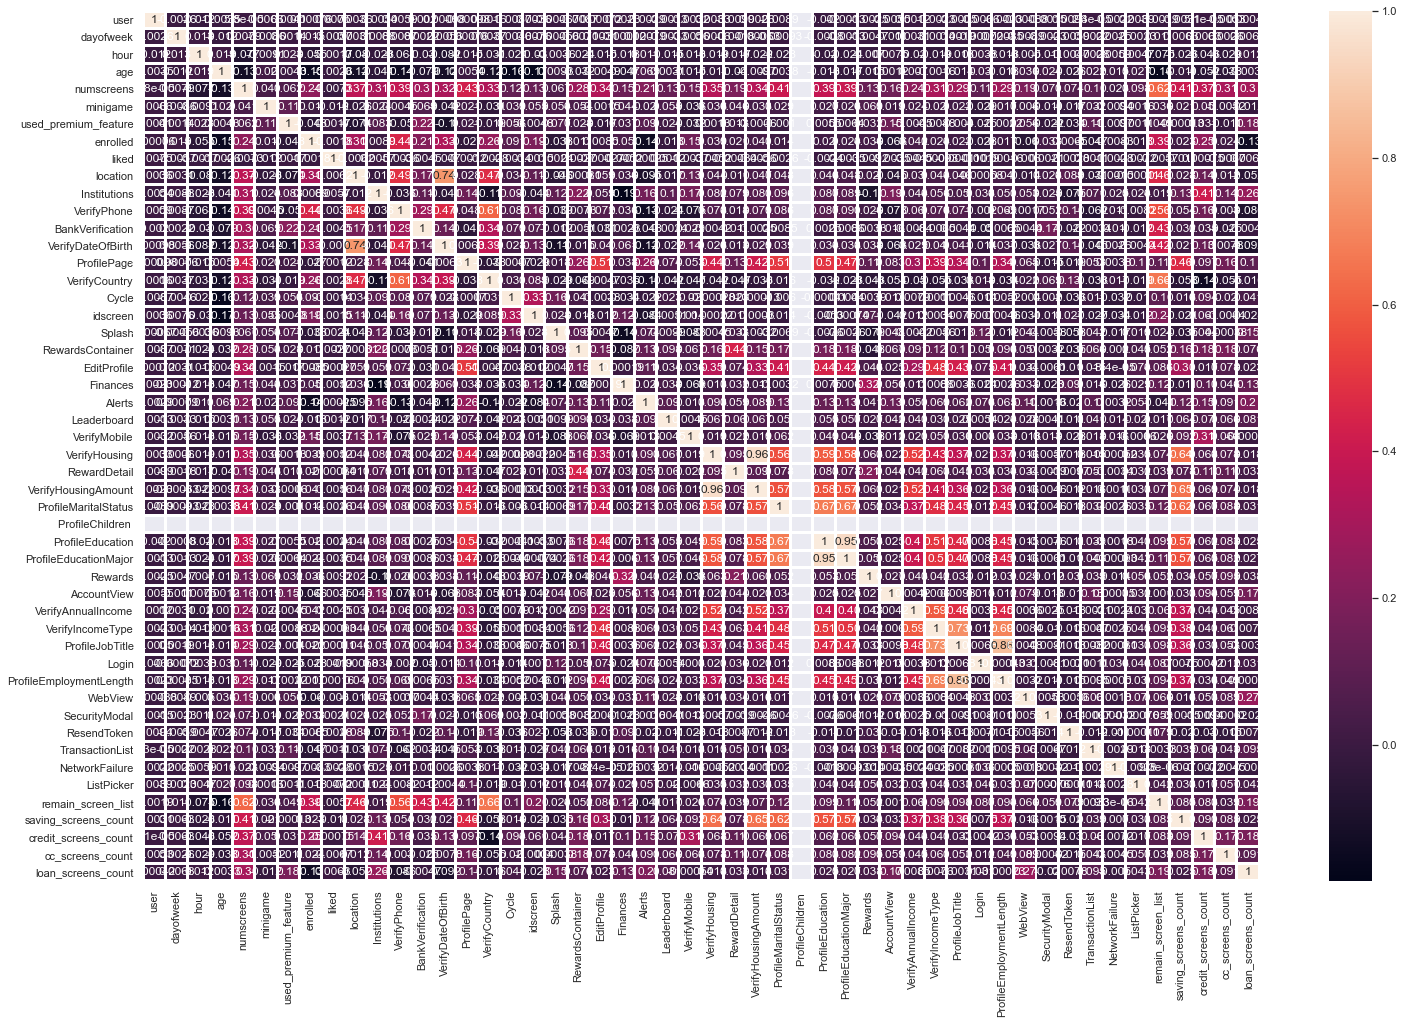

In [63]:
plt.figure(figsize=(25, 16))
sns.heatmap(fineTech_appData.corr(), annot= True, linewidths= 2)

In [64]:
fineTech_appData.enrolled

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


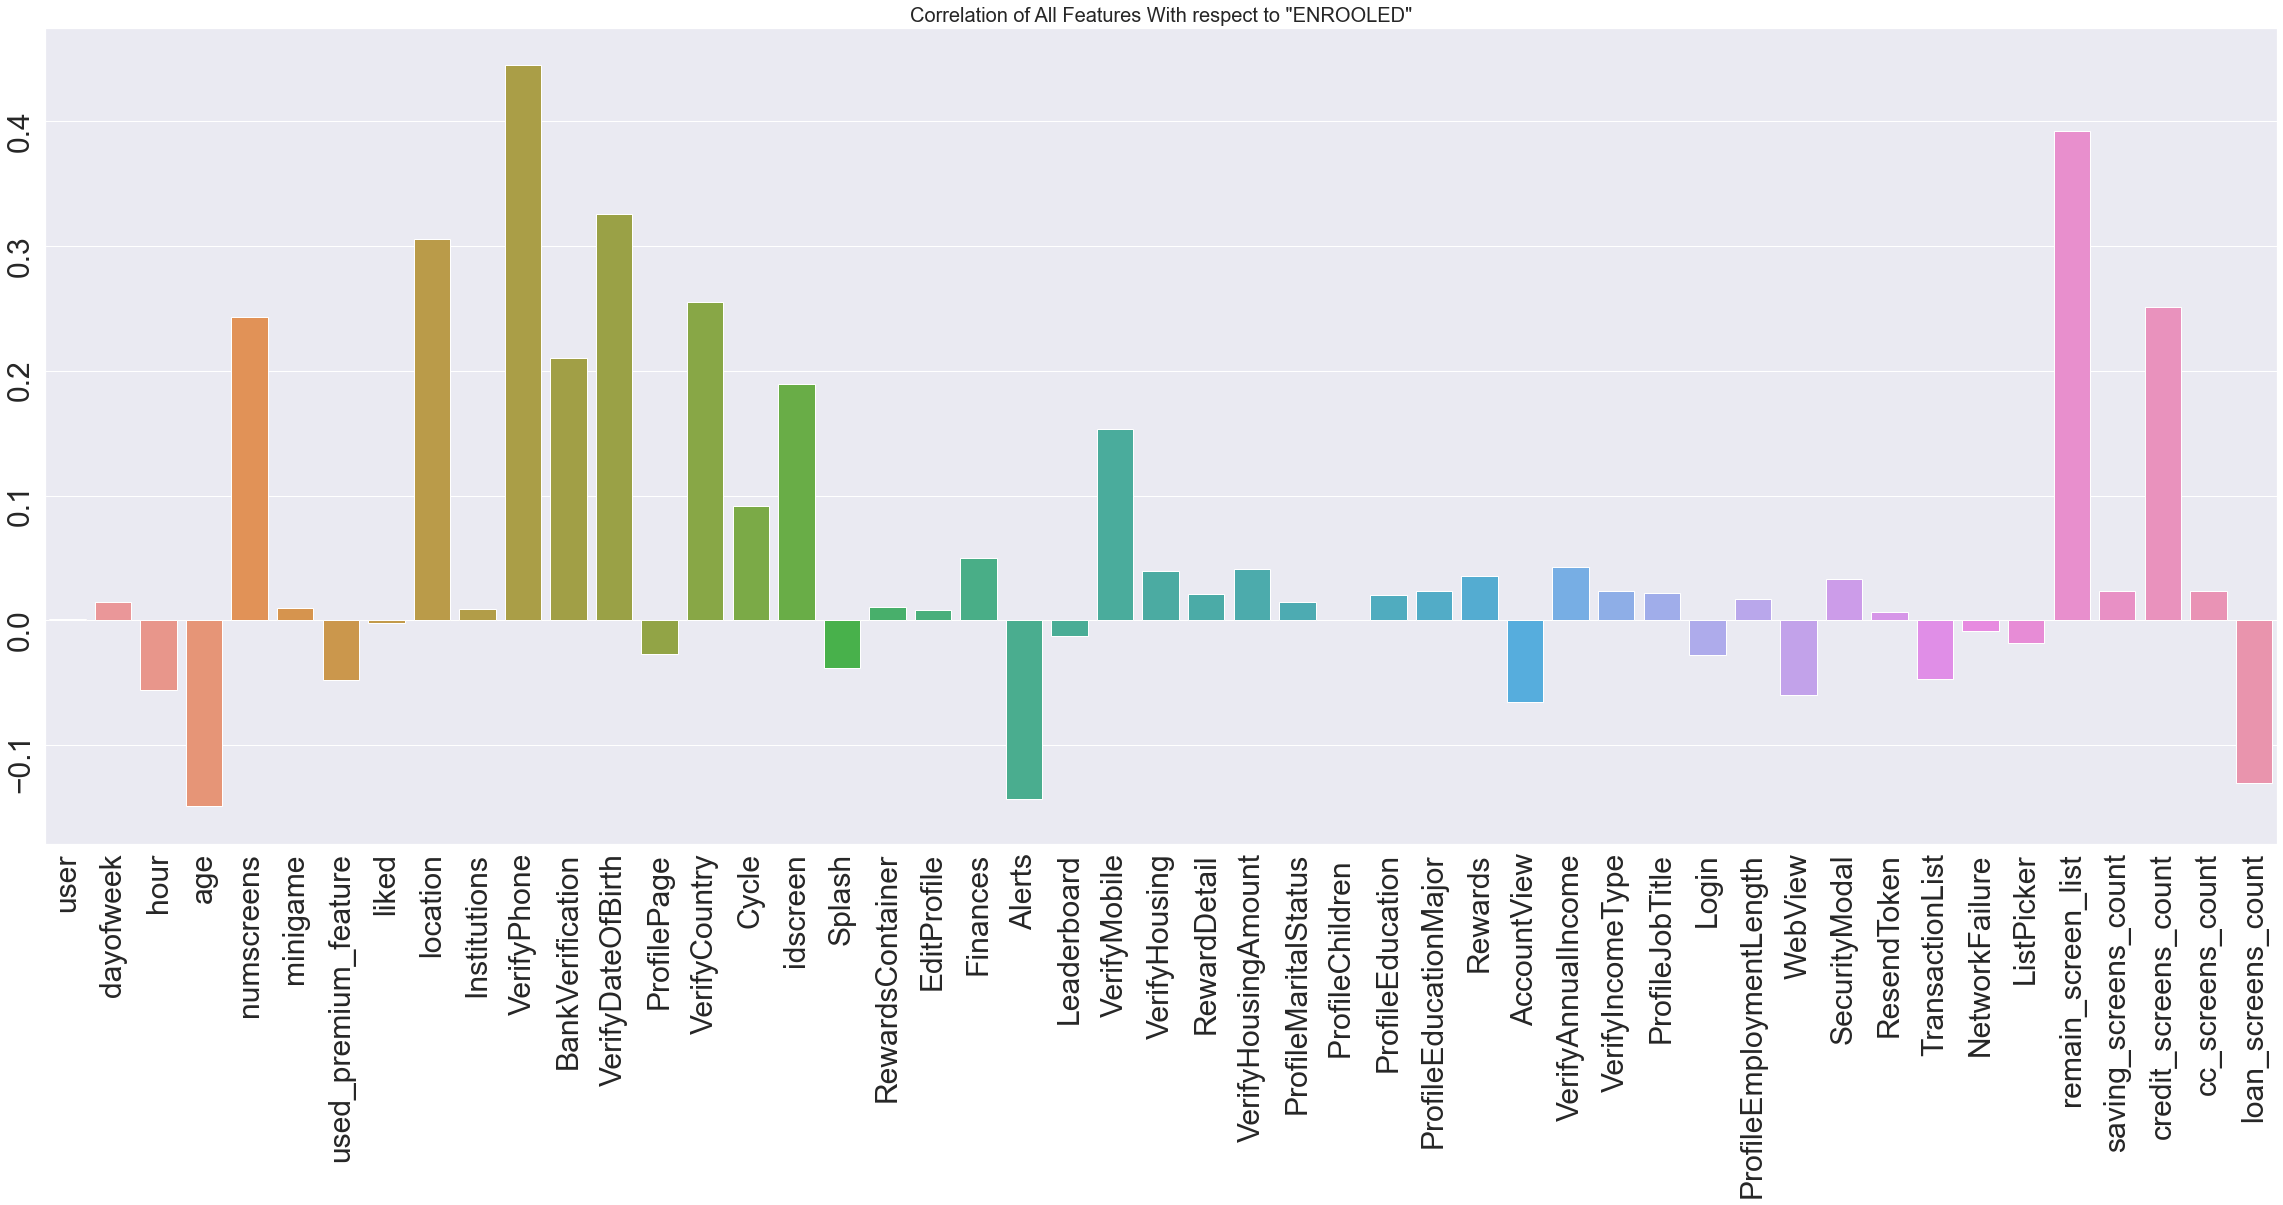

In [65]:
# show corelation barplot

sns.set() # set background dark grid
plt.figure(figsize=(40,15))
plt.title('Correlation of All Features With respect to "ENROOLED"', fontsize = 20)
fineTech_appData5 = fineTech_appData.drop(['enrolled'], axis = 1) # drop enrolled Feature
ax = sns.barplot(fineTech_appData5.columns, fineTech_appData5.corrwith(fineTech_appData.enrolled)) # plot Barplot
ax.tick_params(labelsize = 30, labelrotation = 90, color = 'k')

In [66]:
fineTech_appData.enrolled

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

In [67]:
fineTech_appData['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

# Data Preprocessing

## Split data into train and test

In [68]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns='enrolled', inplace= True)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 49)
(10000, 49)
(40000,)
(10000,)


In [71]:
train_userID = X_train['user']
X_train.drop(columns='user', inplace= True)
test_userID = X_test['user']
X_test.drop(columns='user', inplace=True)

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 48)
(10000, 48)
(40000,)
(10000,)


# Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Model Building

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
# dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model1 = DecisionTreeClassifier(criterion = 'entropy')
dt_model1.fit(X_train, y_train)
y_predict_dt = dt_model1.predict(X_test)
accuracy_Dt = accuracy_score(y_test, y_predict_dt)
accuracy_Dt

0.7005

In [80]:
## Train with Standard Scaling
dt_model2 = DecisionTreeClassifier(criterion = 'entropy')
dt_model2.fit(X_train_sc, y_train)
y_predict_dt_sc = dt_model2.predict(X_test_sc)
accuracy_Dt_Sc = accuracy_score(y_test, y_predict_dt_sc)
accuracy_Dt_Sc

0.6971

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train, y_train)
y_predict_knn = knn_model1.predict(X_test)
accuracy_Knn = accuracy_score(y_test, y_predict_knn)
accuracy_Knn

0.6994

In [82]:
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train_sc, y_train)
y_predict_knn_Sc = knn_model2.predict(X_test_sc)
accuracy_Knn_Sc = accuracy_score(y_test, y_predict_knn_Sc)
accuracy_Knn_Sc

0.732

# Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
nb_model1 = GaussianNB()
nb_model1.fit(X_train, y_train)
y_predict_nb = nb_model1.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_predict_nb)
accuracy_nb

0.7114

In [84]:
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_predict_nb = nb_model2.predict(X_test_sc)
accuracy_nb_Sc = accuracy_score(y_test, y_predict_nb)
accuracy_nb_Sc

0.7123

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_model1 = RandomForestClassifier(n_estimators=10,criterion='entropy')
rf_model1.fit(X_train, y_train)
y_predict_rf = rf_model1.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
accuracy_rf

0.7651

In [88]:
rf_model2 = RandomForestClassifier(n_estimators=10,criterion='entropy')
rf_model2.fit(X_train_sc, y_train)
y_predict_rf_Sc = rf_model1.predict(X_test_sc)
accuracy_rf_Sc = accuracy_score(y_test, y_predict_rf_Sc)
accuracy_rf_Sc

0.5506

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_Lr = accuracy_score(y_test, y_pred_lr)
accuracy_Lr

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7683

In [96]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression()
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_Lr_Sc = accuracy_score(y_test, y_pred_lr_sc)
accuracy_Lr_Sc

0.7679

# Support Vector Machine

In [98]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svc)
accuracy_svm

0.7609

In [99]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_svm_Sc = accuracy_score(y_test, y_pred_svc_sc)
accuracy_svm_Sc

0.7789

In [ ]:
# from sklearn.svm import SVC
# grid_para = {'C':[1,10,100], 'gamma':[1, 0.01, 0.001], 'kernel':['rbf']} 

# from sklearn.model_selection import GridSearchCV
# grid_lr = GridSearchCV(SVC(), param_grid = grid_para, refit = True, verbose = 4, n_jobs = -1)
# grid_lr.fit(X_train, y_train)
# grid_pred_lr = grid_lr.predict(X_test)

# cm_grid_lr = confusion_matrix(y_test, grid_pred_lr)
# sns.heatmap(cm_grid_lr, annot = True, fmt = 'g')

# accuracy_svm_gs = accuracy_score(y_test, grid_pred_lr)
# accuracy_svm_gs

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.5min


# XGBoost

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_Xg = accuracy_score(y_test, y_pred_xgb)
acaccuracy_Xg

In [ ]:
# train with Standard Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_Xg_Sc = accuracy_score(y_test, y_pred_xgb_sc)
accuracy_Xg_Sc